## Exploratory Data Analysis in Indonesia
### Road to Explore:

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Filter for Indonesia Data Analyst Roles

In [36]:
df_DA_INA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Indonesia')]

### Location to Explore

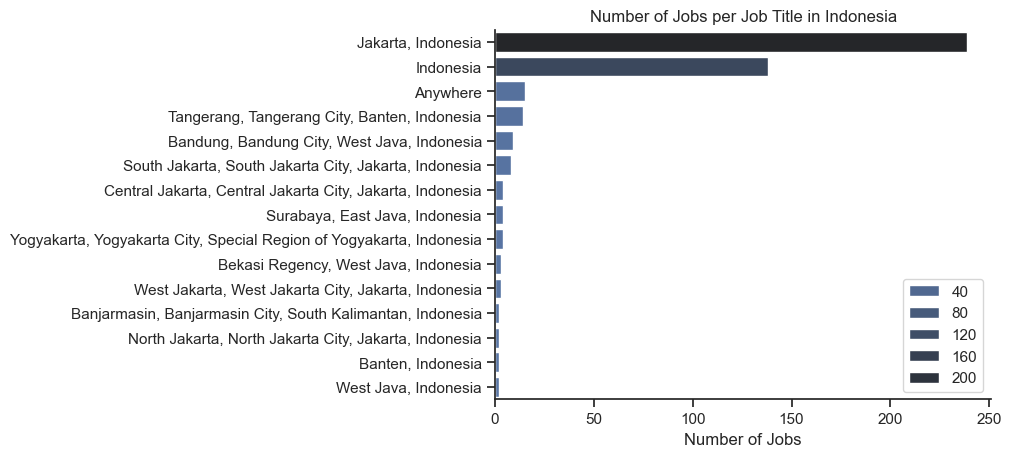

In [49]:
# Top 10 Locations with most Data Analyst Jobs in Indonesia
df_plot = df_DA_INA['job_location'].value_counts().head(15).to_frame() 

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()

plt.title('Number of Jobs per Job Title in Indonesia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.legend(loc='lower right')
plt.show()

### Job Opportunities

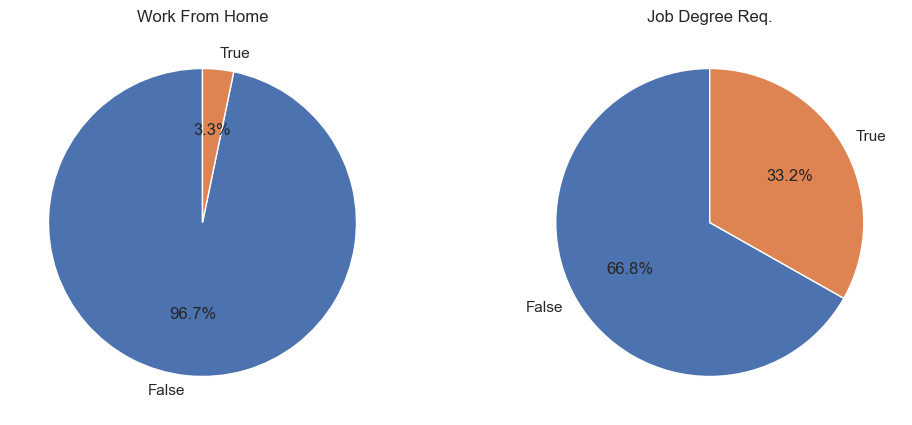

In [50]:
dict_column = {
    'job_work_from_home' : 'Work From Home',
    'job_no_degree_mention' : 'Job Degree Req.',
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_INA[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
    
plt.show()

### Companies to Explore

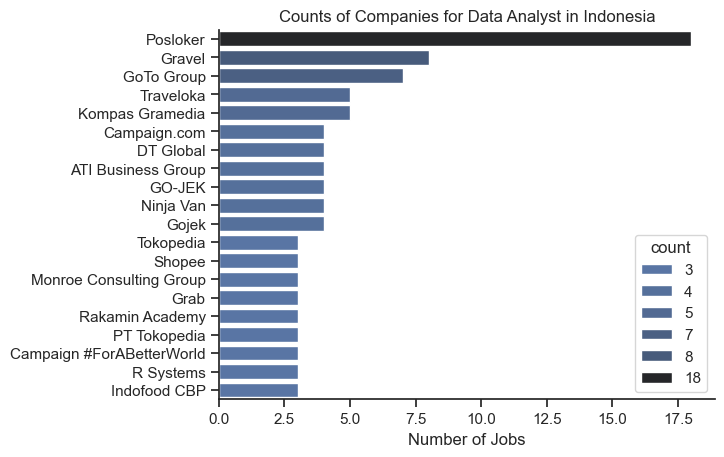

In [53]:
df_plot = df_DA_INA['company_name'].value_counts().head(20).to_frame() 

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine()

plt.title('Counts of Companies for Data Analyst in Indonesia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()